# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

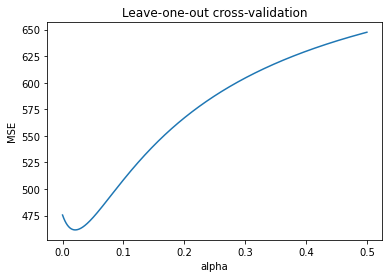

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import random

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = np.arange(0,0.5,0.0005)
MSE=[]
err=0
#Leave-one-out cross-validation
# add 1-3 line of code here
for alpha in alphas:
    err=0
    for i in range(y.shape[0]):
        x_in = x
        y_in = y
        x_in = np.delete(x_in, i, axis=0)
        y_in = np.delete(y_in, i ,axis=0)
        w=np.linalg.inv(x_in.T*x_in + alpha * I)*x_in.T*y_in
        w=w.ravel()
        y_out = x * w.T
        err+=(y-y_out)[i]**2
    err=err/y.shape[0]
    MSE.append(err[0,0])
    
# add 1-3 lines to compare the results

fig, ax = plt.subplots()
ax.plot(alphas, MSE)
ax.set(xlabel='alpha', ylabel='MSE', title='Leave-one-out cross-validation')
plt.show()


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [79]:
def sgd(coeffs,x,y,epochs,rate, l1):
    norm=np.linalg.norm(x,axis=0)
    #print(norm)
    w=coeffs[0]
    b=coeffs[1]
    m=y.shape[0]
    n=x.shape[1]
    for i in range(epochs):
            x_in=x[:,1].reshape(-1,1)
            y_pred = x_in*w+b
            delta=y-y_pred
            if w>0:
                dW=(- (2*x_in.T.dot(delta)) + l1 )/norm[1]**2
                #print(dW)
            else:
                dW=(- (2*x_in.T.dot(delta)) - l1 )/norm[1]**2
            db=-2*np.sum(y-y_pred)//norm[0]**2
            w=w-rate*dW
            b=b-rate*db
    
            
    coeffs[0]=b
    coeffs[1]=w
    return coeffs
    # your code goes here

In [80]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1

init_c=np.zeros((2,1))

w2 = sgd(init_c,x,y,1600,0.1,alpha)
w2 = w2.ravel()
print(w2)

w1 = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
w1=w1.ravel()
print(w1)
#w1

[  3.87298335 681.21142093]
[-101.9          1.1695111]
[[-101.72397081    1.16978757]]


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_target_df = pd.DataFrame(iris_data.target)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values # change here
y = iris_target_df.values # change here


dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

In [82]:
#y_pred